# Cursory Analysis into the Philadelphia Eagles Football Team 2013-2022 
## Attempting to ascertain variables that lead to wins via Margin of Victory 
### By: 
#### Abdelrahim, Omer | Musabandesu, George | Reyhan, Achmed | O'Keefe, Connor

In [5]:
# Libraries Install
from fitter import Fitter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import scipy.stats as stats
import requests
from ydata_profiling import ProfileReport

In [9]:
# Cleaning Data 
# df_cleaned = combined_df.dropna(axis=0, thresh=20)
# df_cleaned['Offense']=df_cleaned['Offense'].fillna(0)
# df_cleaned['Defense']=df_cleaned['Defense'].fillna(0)
# df_cleaned['Win']=np.where(df_cleaned['Unnamed: 5_level_0']=='W',1,0)
# df_cleaned['Unnamed: 8_level_0']=df_cleaned['Unnamed: 8_level_0'].fillna(0)
# df_cleaned['Home_Games']=np.where(df_cleaned['Unnamed: 8_level_0']=='@',1,0)
# df_cleaned=df_cleaned.drop(columns=['Unnamed: 8_level_0', 'Unnamed: 6_level_0'], axis=1)

In [10]:
# df_cleaned.to_csv('Eagles_Data_Final.csv')
# Some header cleaning such that ther are no subheaders

# eagles=pd.read_csv("/Users/omerabdelrahim/Downloads/Eagles_Data_Final.csv", sep=";")
# eagles['MOV']=eagles['TmScore']-eagles['OppScore']
# eagles['MOT']=eagles['DTO']-eagles['OTO']
# eagles=eagles.drop(['Rec'], axis=1)
# eagles.to_csv('Eagles_10yr.csv')

#1. Descriptive Analysis: Perform a univariate analysis following the steps below.

We will be analyzing data for the Philadelphia Eagles Football Team from the years 2013 to 2022. Our goal is to ultimately find out the most appropriate variables that contributed to Margin Of Victory (MOV) for the team.

## (a) Begin by providing a descriptive analysis of your variables (include all predictors and response variable). This should include things like histograms, quantile plots, correlation plots, etc.

### Variable Names:

MOV= Margin of Victory

MOT = Margin of Turnover

O1stD = First Downs Gained

D1stD = First Downs Allowed

DRushY = Rush Yards Allowed

ORushY = Rush Yards Gained

Home_Games = Indicator Variable for whether the game was played at home. 0 means away, 1 means home

EOffense = Expected Offensive Points

EDefense = Expected Defensive Points

ESpTms = Expected Specials Teams Points


In [6]:
eagles=pd.read_csv('Eagles_10yr (1).csv')
eagles.describe()

Unnamed: 0  Observations         Year     TmScore    OppScore  \
count  173.000000    173.000000   173.000000  173.000000  173.000000   
mean    86.000000     86.000000  2017.624277   25.433526   22.531792   
std     50.084928     50.084928     2.900058    9.385319   10.502789   
min      0.000000      0.000000  2013.000000    0.000000    0.000000   
25%     43.000000     43.000000  2015.000000   20.000000   16.000000   
50%     86.000000     86.000000  2018.000000   24.000000   22.000000   
75%    129.000000    129.000000  2020.000000   32.000000   27.000000   
max    172.000000    172.000000  2022.000000   54.000000   53.000000   

            O1stD      OTotYd      OPassY      ORushY         OTO       D1stD  \
count  173.000000  173.000000  173.000000  173.000000  173.000000  173.000000   
mean    21.566474  368.005780  239.242775  128.763006    1.427746   20.144509   
std      4.403015   82.135983   75.380423   58.052567    1.249062    5.293363   
min      9.000000  139.000000   82.000000    7.000000    0.000000    8.000000   
25%     19.000000  313.000000  179.000000   94.000000    0.000000   16.000000   
50%     22.000000  373.000000  232.000000  118.000000    1.000000   20.000000   
75%     25.000000  428.000000  298.000000  156.000000    2.000000   24.000000   
max     34.000000  542.000000  462.000000  363.000000    5.000000   35.000000   

           DTotYd      DPassY      DRushY         DTO         Win  Home_Games  \
count  173.000000  173.000000  173.000000  173.000000  173.000000  173.000000   
mean   350.965318  243.445087  107.520231    1.456647    0.566474    0.485549   
std     93.325630   82.640041   46.532758    1.183523    0.497000    0.501242   
min     89.000000   61.000000    6.000000    0.000000    0.000000    0.000000   
25%    287.000000  182.000000   74.000000    1.000000    0.000000    0.000000   
50%    349.000000  239.000000  101.000000    1.000000    1.000000    0.000000   
75%    412.000000  297.000000  134.000000    2.000000    1.000000    1.000000   
max    613.000000  500.000000  283.000000    5.000000    1.000000    1.000000   

              MOV         MOT  
count  173.000000  173.000000  
mean     2.901734    0.028902  
std     14.700366    1.789594  
min    -41.000000   -5.000000  
25%     -6.000000   -1.000000  
50%      3.000000    0.000000  
75%     11.000000    1.000000  
max     43.000000    5.000000

In [7]:
# Replace the commas in the data with periods
eagles['EOffense'] = eagles.EOffense.str.replace(',', '.')
eagles['EDefense'] = eagles.EDefense.str.replace(',', '.')
eagles['ESpTms'] = eagles.ESpTms.str.replace(',', '.')

In [8]:
# Convert the objects to floats
eagles['EOffense'] = eagles.EOffense.astype(float)
eagles['EDefense'] = eagles.EDefense.astype(float)
eagles['ESpTms'] = eagles.ESpTms.astype(float)

In [9]:
print(eagles.columns)

Index(['Unnamed: 0', 'Observations', 'Year', 'Week', 'Day', 'Date', 'Time',
       'Source', 'WL', 'Opp', 'TmScore', 'OppScore', 'O1stD', 'OTotYd',
       'OPassY', 'ORushY', 'OTO', 'D1stD', 'DTotYd', 'DPassY', 'DRushY', 'DTO',
       'EOffense', 'EDefense', 'ESpTms', 'Win', 'Home_Games', 'MOV', 'MOT'],
      dtype='object')


In [10]:
print(type(eagles))

<class 'pandas.core.frame.DataFrame'>


In [11]:
# Check for null values
eagles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    173 non-null    int64  
 1   Observations  173 non-null    int64  
 2   Year          173 non-null    int64  
 3   Week          173 non-null    object 
 4   Day           173 non-null    object 
 5   Date          173 non-null    object 
 6   Time          173 non-null    object 
 7   Source        173 non-null    object 
 8   WL            173 non-null    object 
 9   Opp           173 non-null    object 
 10  TmScore       173 non-null    int64  
 11  OppScore      173 non-null    int64  
 12  O1stD         173 non-null    int64  
 13  OTotYd        173 non-null    int64  
 14  OPassY        173 non-null    int64  
 15  ORushY        173 non-null    int64  
 16  OTO           173 non-null    int64  
 17  D1stD         173 non-null    int64  
 18  DTotYd        173 non-null    

In [12]:
# Count the number of null values
eagles.isnull().sum()

Unnamed: 0      0
Observations    0
Year            0
Week            0
Day             0
Date            0
Time            0
Source          0
WL              0
Opp             0
TmScore         0
OppScore        0
O1stD           0
OTotYd          0
OPassY          0
ORushY          0
OTO             0
D1stD           0
DTotYd          0
DPassY          0
DRushY          0
DTO             0
EOffense        0
EDefense        0
ESpTms          0
Win             0
Home_Games      0
MOV             0
MOT             0
dtype: int64

In [14]:
# Initial linear model test
model1 = smf.ols(formula='MOV~MOT+DRushY+ORushY+O1stD+D1stD+Home_Games', data=eagles)
model1_results=model1.fit()
print(model1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    MOV   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     41.45
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           1.30e-30
Time:                        23:49:59   Log-Likelihood:                -630.78
No. Observations:                 173   AIC:                             1276.
Df Residuals:                     166   BIC:                             1298.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0746      5.268      2.861      0.0

Our inital regression suggests multicollinearity (there are many endogenous variables). The offensive variables all have positive correlation with MOV, and the defensive vice a versa. The intercept starts at 15 MOV, which seems rather ridiculous and is probably not interpretable. All p-values are significant except home games which has a bizarre negative value. Maybe a logit regression or a 2 stage least squares would be appropriate for such an identifier variable rather than normal regression. 

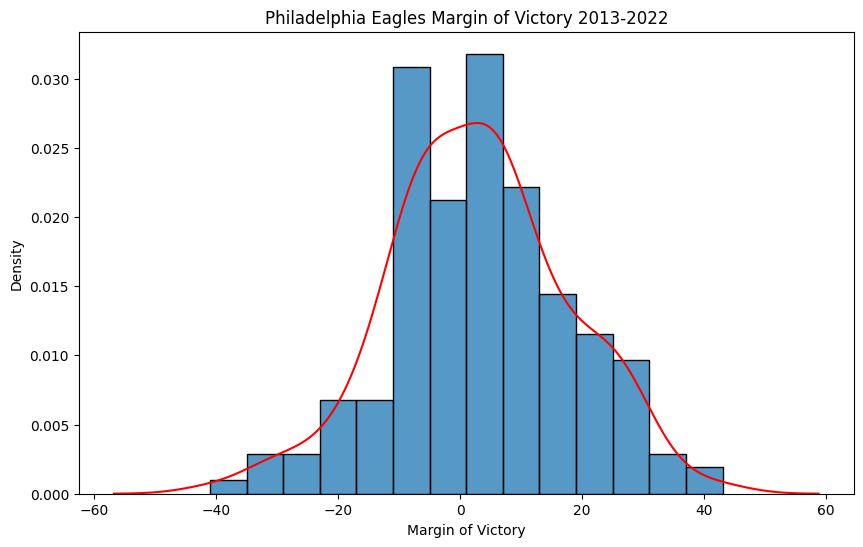

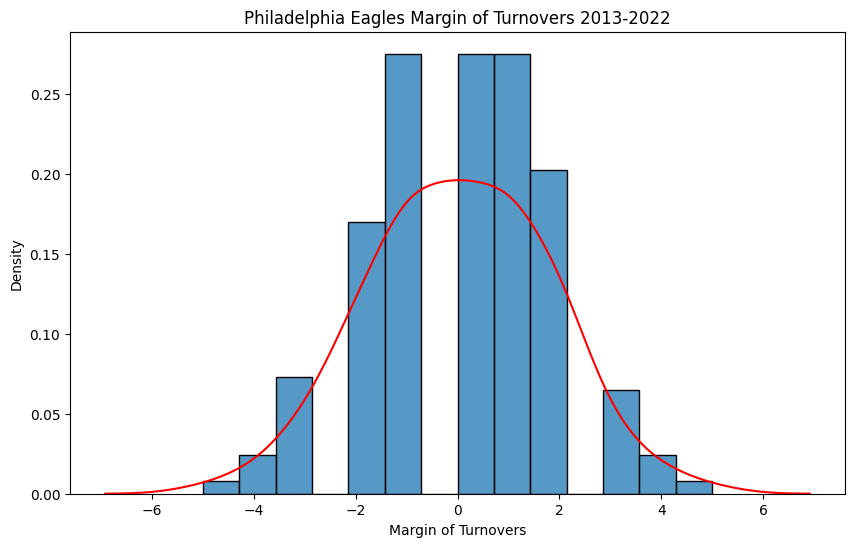

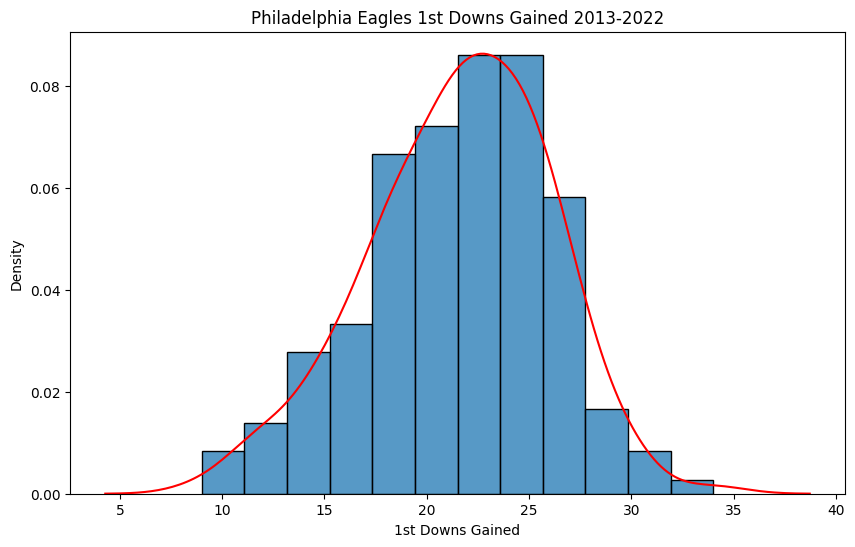

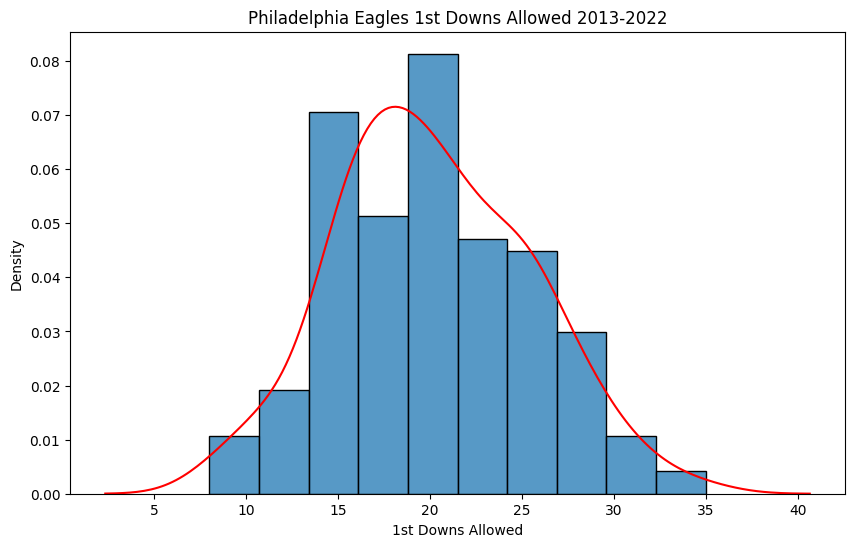

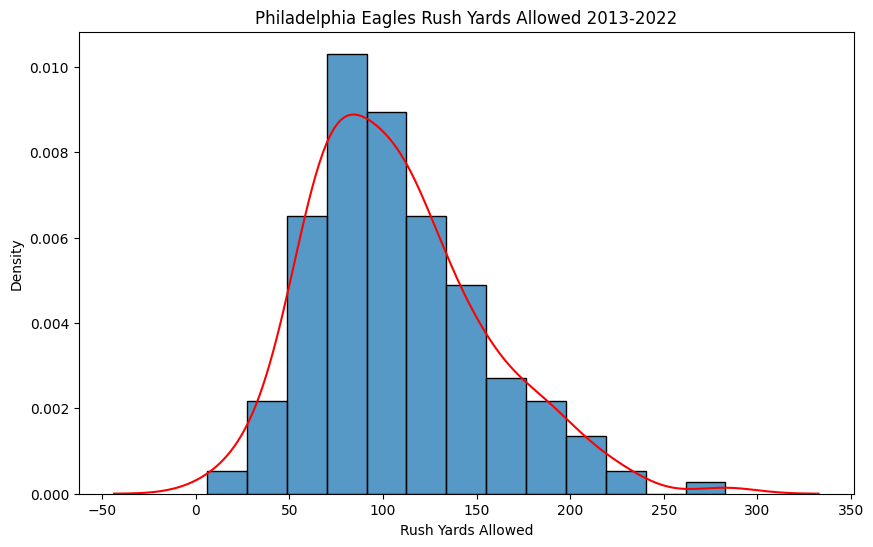

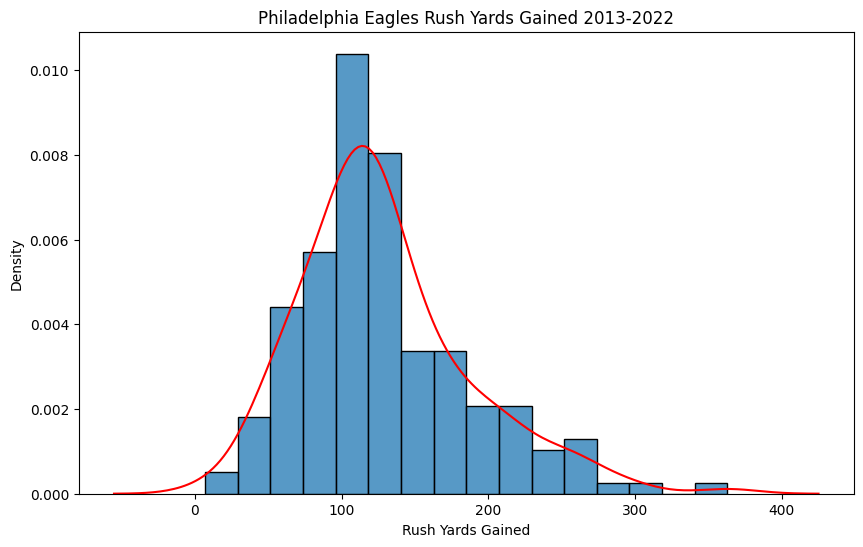

In [15]:
# Histograms and Density plots

plt.figure(figsize = (10,6))
sns.histplot(eagles.MOV, stat = "density")
sns.kdeplot(eagles.MOV, color = "red")
plt.title("Philadelphia Eagles Margin of Victory 2013-2022")
plt.xlabel("Margin of Victory")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(eagles.MOT, stat = "density")
sns.kdeplot(eagles.MOT, color = "red")
plt.title("Philadelphia Eagles Margin of Turnovers 2013-2022")
plt.xlabel("Margin of Turnovers")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(eagles.O1stD, stat = "density")
sns.kdeplot(eagles.O1stD, color = "red")
plt.title("Philadelphia Eagles 1st Downs Gained 2013-2022")
plt.xlabel("1st Downs Gained")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(eagles.D1stD, stat = "density")
sns.kdeplot(eagles.D1stD, color = "red")
plt.title("Philadelphia Eagles 1st Downs Allowed 2013-2022")
plt.xlabel("1st Downs Allowed")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(eagles.DRushY, stat = "density")
sns.kdeplot(eagles.DRushY, color = "red")
plt.title("Philadelphia Eagles Rush Yards Allowed 2013-2022")
plt.xlabel("Rush Yards Allowed")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(eagles.ORushY, stat = "density")
sns.kdeplot(eagles.ORushY, color = "red")
plt.title("Philadelphia Eagles Rush Yards Gained 2013-2022")
plt.xlabel("Rush Yards Gained")
plt.show()


The density curve on the above plots appears to show a normal distribution. The variables DRushY and ORushY appear to show more skewness compared to the rest of the variables. These might need to be transformed.

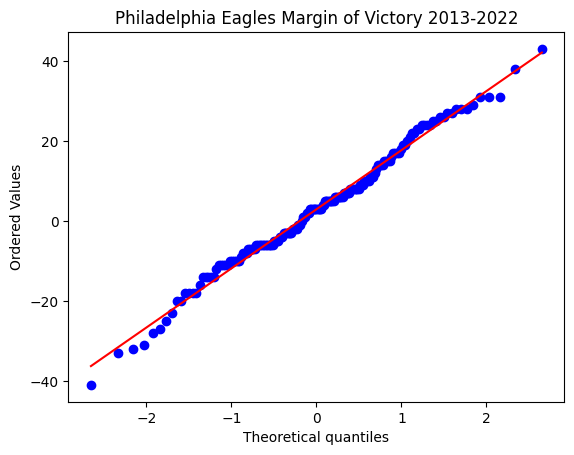

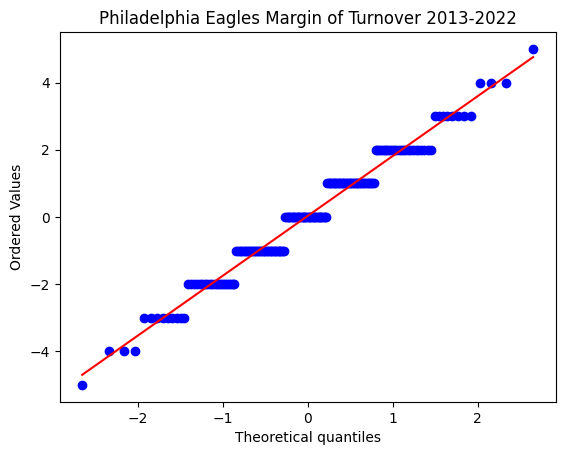

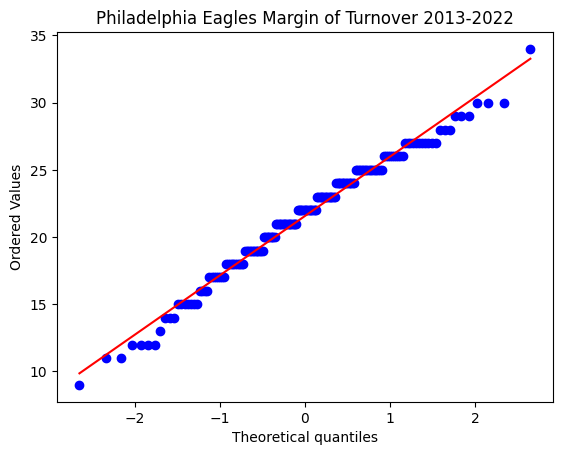

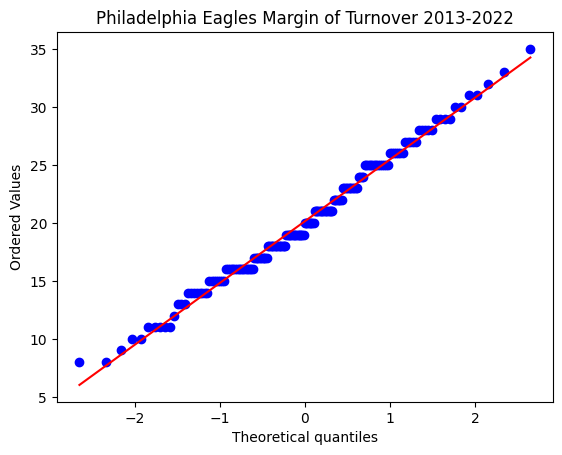

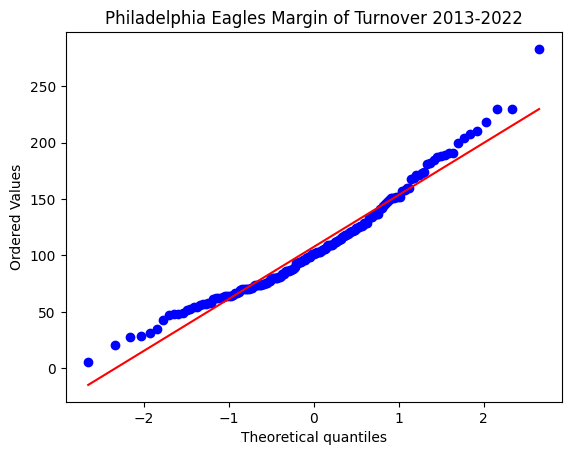

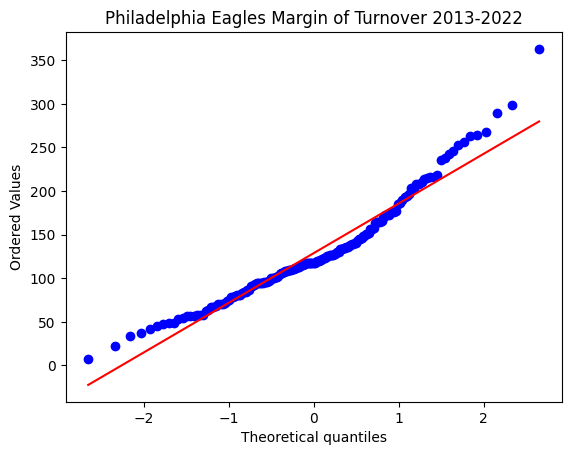

In [16]:
# QQ-Plots

stats.probplot(eagles.MOV, dist="norm", plot=plt)
plt.title("Philadelphia Eagles Margin of Victory 2013-2022")
plt.show()

stats.probplot(eagles.MOT, dist="norm", plot=plt)
plt.title("Philadelphia Eagles Margin of Turnover 2013-2022")
plt.show()

stats.probplot(eagles.O1stD, dist="norm", plot=plt)
plt.title("Philadelphia Eagles Margin of Turnover 2013-2022")
plt.show()

stats.probplot(eagles.D1stD, dist="norm", plot=plt)
plt.title("Philadelphia Eagles Margin of Turnover 2013-2022")
plt.show()

stats.probplot(eagles.DRushY, dist="norm", plot=plt)
plt.title("Philadelphia Eagles Margin of Turnover 2013-2022")
plt.show()

stats.probplot(eagles.ORushY, dist="norm", plot=plt)
plt.title("Philadelphia Eagles Margin of Turnover 2013-2022")
plt.show()

The data in the six variables appears to be normal for the most part even though some deviations from the x=y line can be observed. More quantitative analysis is needed to conclude normality.

<Axes: >

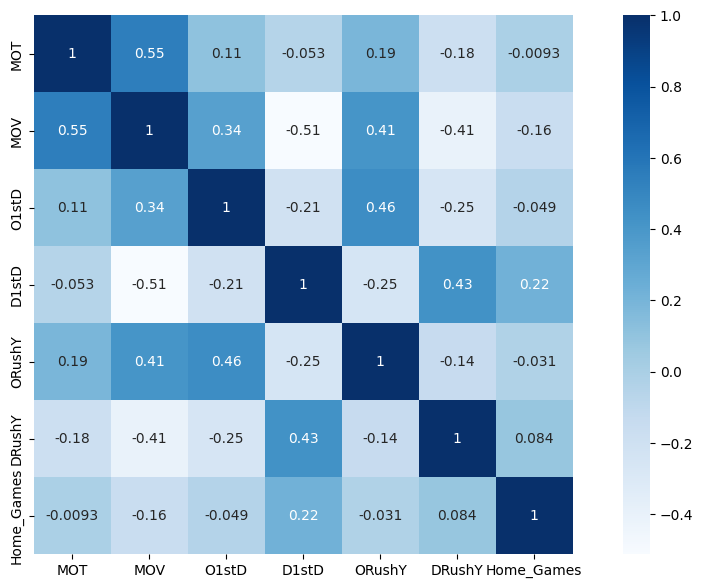

In [17]:
# Correlation Plot
r_vars=eagles[['MOT','MOV','O1stD','D1stD','ORushY','DRushY','Home_Games']]

plt.figure(figsize=(13,7))
data=r_vars
c= data.corr()
sns.heatmap(c,cmap="Blues",annot=True,square = True)

As can be viewed in this correlation plot "heatmap" some of the strongest relative correlations are between MOV and MOT as well as between O1stD and ORushY and vice a versa for the defensive statistics

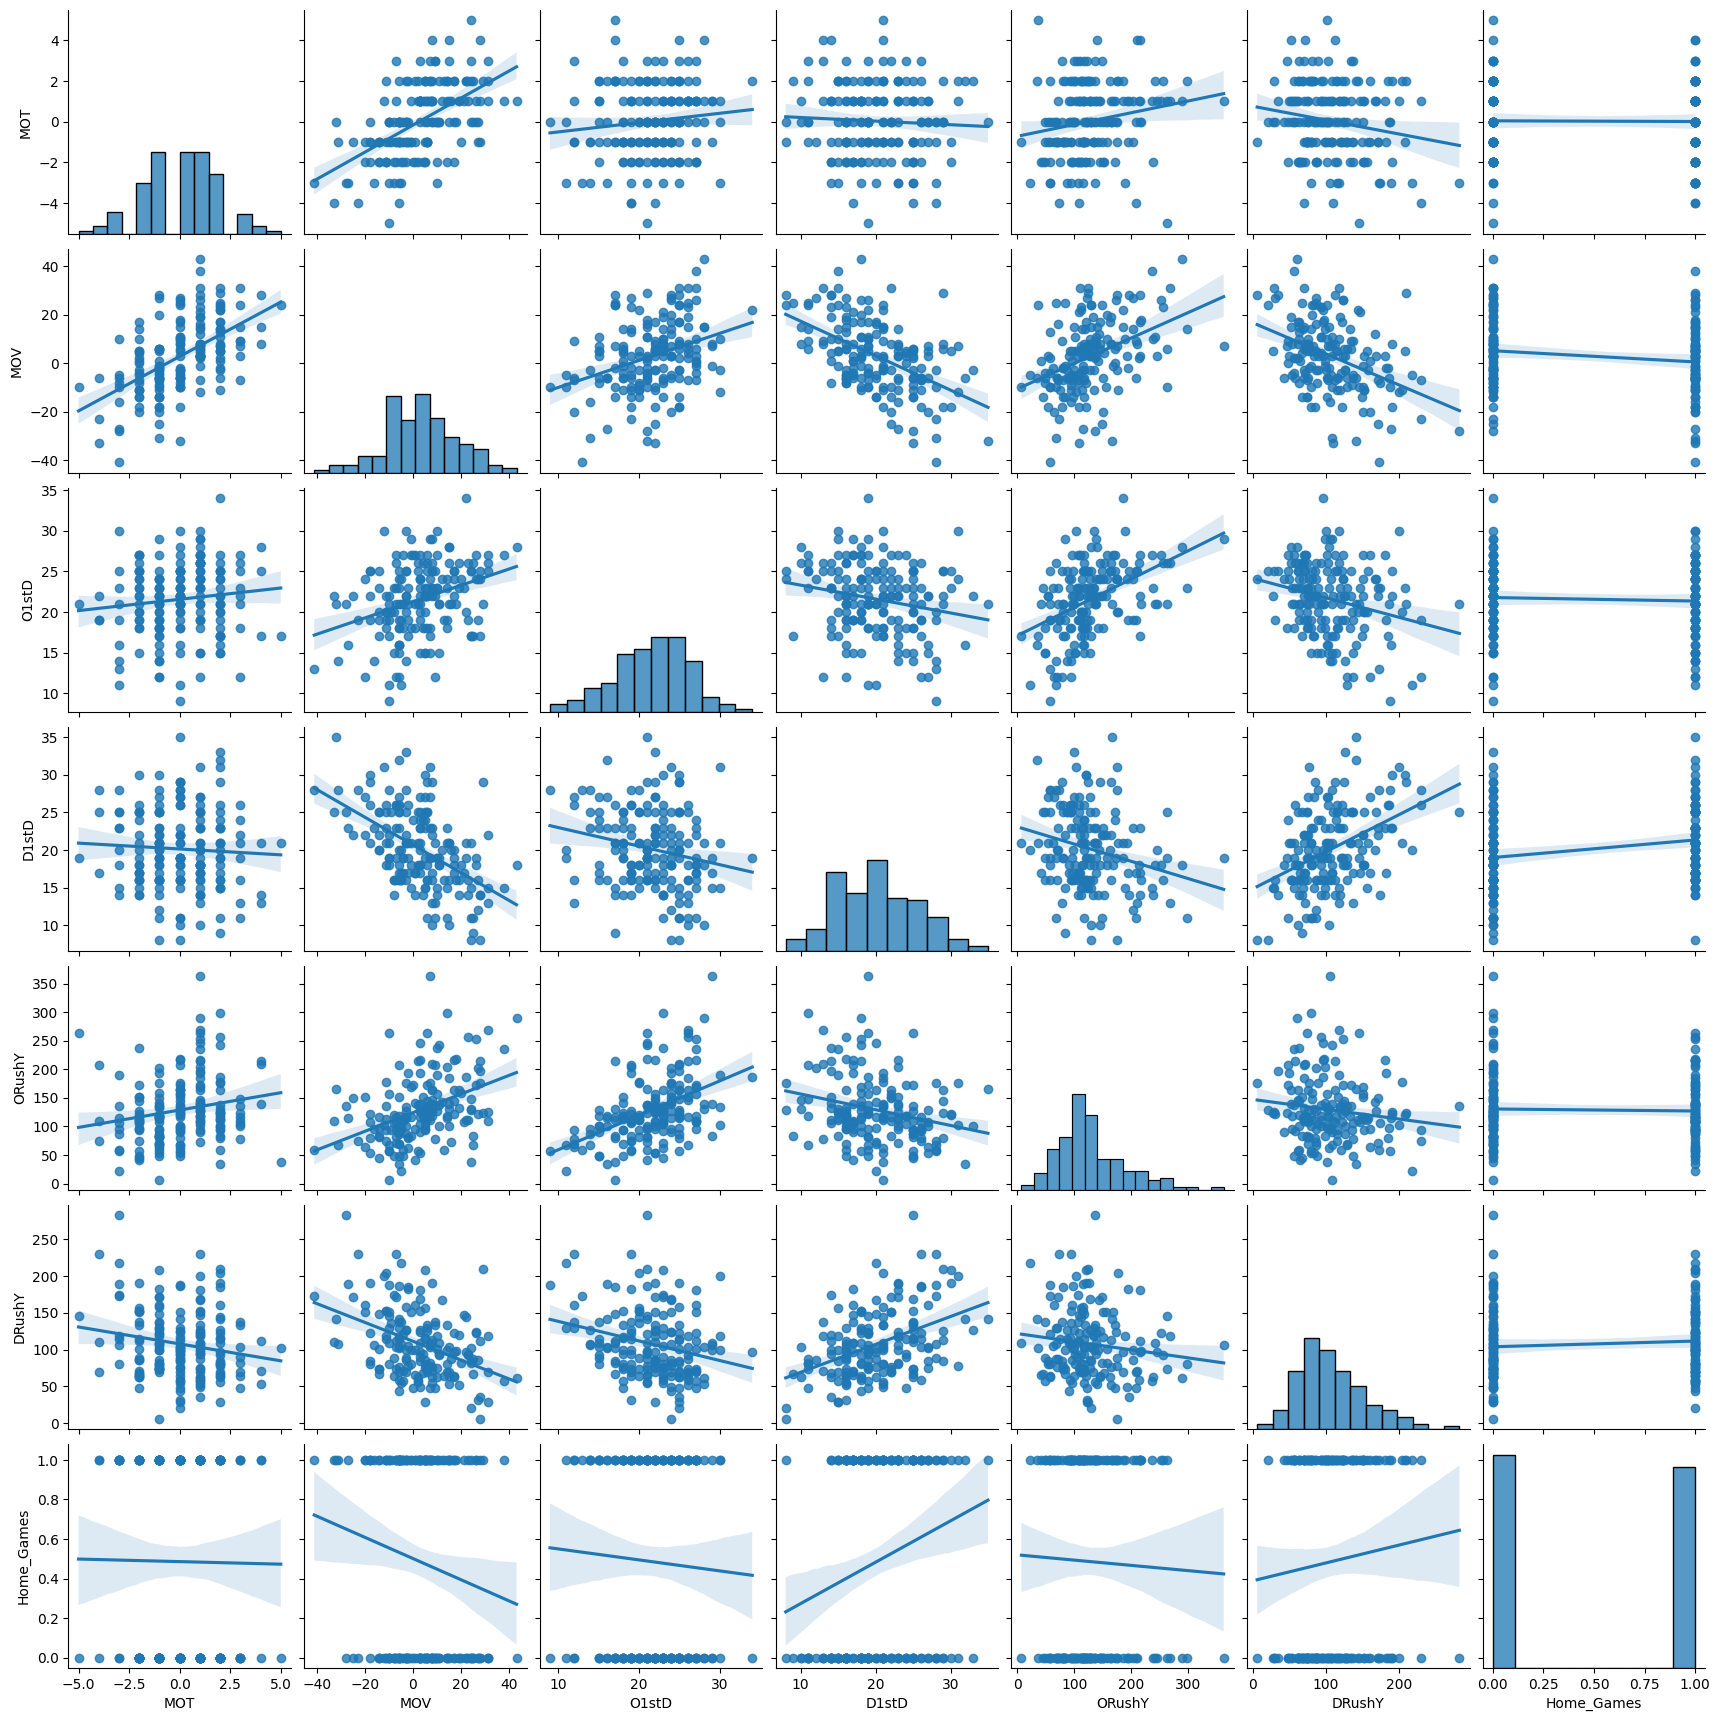

In [14]:
# Pair Plot
sns.pairplot(r_vars, kind='reg')

## (b) Discuss your findings from doing an exploratory analysis using Pandas Profiling. Did you discover anything new?

In [15]:
ProfileReport(r_vars)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The report shows results similar to what we found in 1(a) e.g., number of variables, number of observations and missing cells etc. One new discovery is that the report states that the variable MOT is highly overall correlated with MOV and vice versa. We noticed from our correlation plot that the value is 0.55

## (c) Estimate density distributions (e.g., Cullen & Frey) for all your variables, and show the plots with the respective fits.

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=a

sumsquare_error          aic          bic  kl_div  ks_statistic  \
dweibull            0.016563  1002.625252  1012.085127     inf      0.065805   
genlogistic         0.016883  1003.542444  1013.002318     inf      0.050656   
mielke              0.016904  1000.848890  1013.462057     inf      0.050348   
gengamma            0.016909  1049.243331  1061.856497     inf      0.064808   
burr                0.016924  1001.798222  1014.411388     inf      0.050933   

             ks_pvalue  
dweibull      0.423897  
genlogistic   0.746749  
mielke        0.753335  
gengamma      0.443118  
burr          0.740804

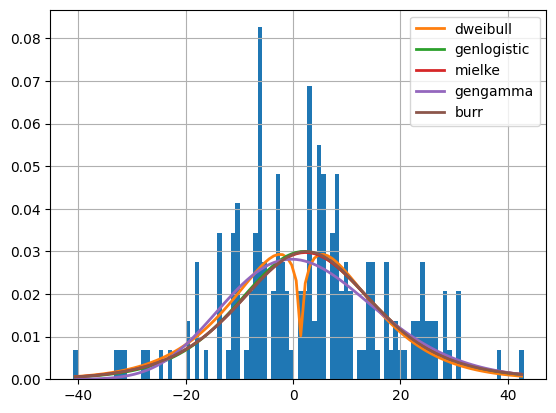

In [26]:
from fitter import Fitter
f = Fitter(eagles.MOV)
f.fit()
f.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the i

sumsquare_error         aic         bic  kl_div  ks_statistic  \
dgamma             13.796826  633.603003  643.062878     inf      0.245257   
dweibull           13.971118  573.850875  583.310750     inf      0.175129   
gennorm            14.141304  569.479033  578.938908     inf      0.110779   
weibull_min        14.141599  566.108074  575.567949     inf      0.107337   
gengamma           14.142542  568.959919  581.573085     inf      0.111033   

                ks_pvalue  
dgamma       1.194577e-09  
dweibull     4.123580e-05  
gennorm      2.643214e-02  
weibull_min  3.438646e-02  
gengamma     2.591388e-02

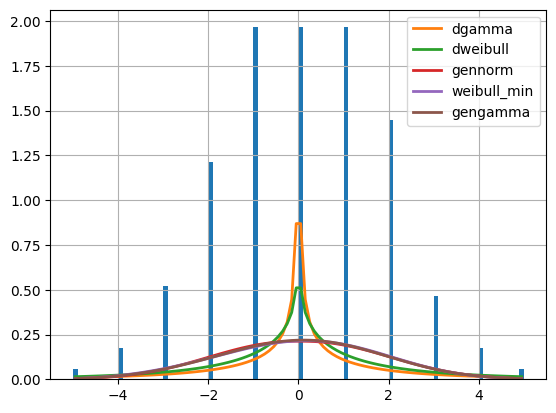

In [27]:
f = Fitter(eagles.MOT)
f.fit()
f.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty 

sumsquare_error         aic         bic  kl_div  ks_statistic  \
burr12                0.017307  846.461690  859.074856     inf      0.033253   
genhyperbolic         0.017336  848.417290  864.183748     inf      0.026649   
skewnorm              0.017338  844.712977  854.172851     inf      0.027018   
pearson3              0.017338  844.221344  853.681218     inf      0.026350   
powernorm             0.017341  844.674398  854.134273     inf      0.027154   

               ks_pvalue  
burr12          0.987656  
genhyperbolic   0.999432  
skewnorm        0.999281  
pearson3        0.999533  
powernorm       0.999218

C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


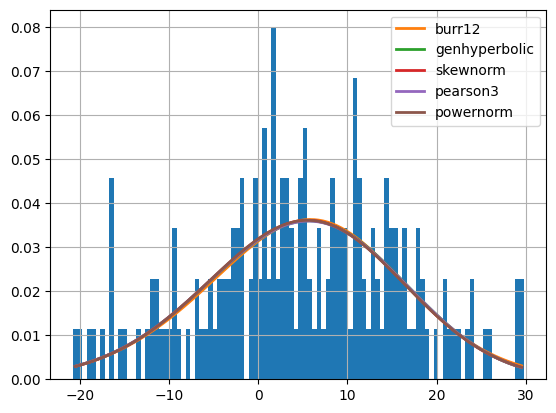

In [28]:
f = Fitter(eagles.EOffense)
f.fit()
f.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be de

sumsquare_error         aic         bic  kl_div  ks_statistic  \
burr12                0.009213  954.313035  966.926202     inf      0.036434   
skewnorm              0.009227  955.699446  965.159321     inf      0.034841   
genhyperbolic         0.009230  959.717410  975.483868     inf      0.035541   
powernorm             0.009233  955.390752  964.850626     inf      0.034770   
norminvgauss          0.009239  957.311268  969.924435     inf      0.035453   

               ks_pvalue  
burr12          0.969344  
skewnorm        0.979919  
genhyperbolic   0.975640  
powernorm       0.980322  
norminvgauss    0.976210

C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


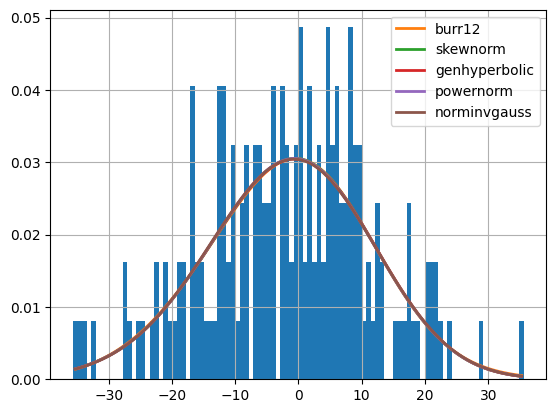

In [29]:
f = Fitter(eagles.EDefense)
f.fit()
f.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED triang distribution (taking more than 30 seconds)
SKIPPED vonmises distribution (taking more than 30 seconds)
SKIPPED vonmises_line dist

sumsquare_error         aic         bic  kl_div  ks_statistic  \
gennorm             0.079485  773.141991  782.601866     inf      0.051626   
logistic            0.080359  774.586283  780.892866     inf      0.044246   
tukeylambda         0.080565  776.274220  785.734095     inf      0.046655   
hypsecant           0.080598  772.908962  779.215545     inf      0.054634   
t                   0.080683  777.893214  787.353089     inf      0.047434   

             ks_pvalue  
gennorm       0.725811  
logistic      0.872087  
tukeylambda   0.828463  
hypsecant     0.659486  
t             0.813315

C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


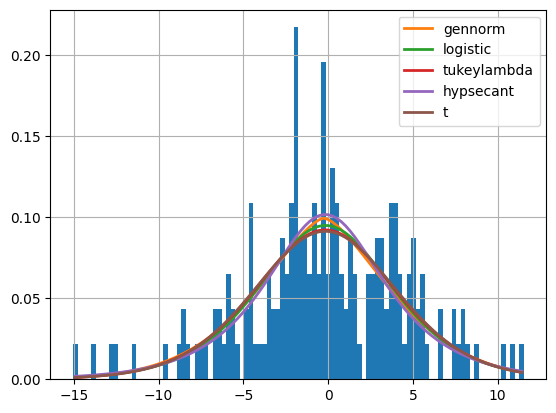

In [30]:
f = Fitter(eagles.ESpTms)
f.fit()
f.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from

sumsquare_error          aic          bic  kl_div  \
genhyperbolic         0.000606  1273.315331  1289.081789     inf   
invweibull            0.000616  1262.841627  1272.301501     inf   
gumbel_r              0.000616  1260.772437  1267.079021     inf   
skewnorm              0.000617  1274.563632  1284.023506     inf   
norminvgauss          0.000621  1271.314025  1283.927192     inf   

               ks_statistic  ks_pvalue  
genhyperbolic      0.035634   0.975024  
invweibull         0.032937   0.988895  
gumbel_r           0.032960   0.988809  
skewnorm           0.034656   0.980961  
norminvgauss       0.038743   0.948471

C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the 

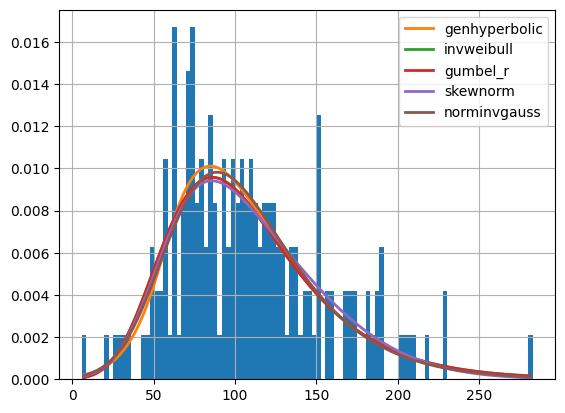

In [31]:
f = Fitter(eagles.DRushY)
f.fit()
f.summary()

C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr dist

sumsquare_error          aic          bic  kl_div  ks_statistic  \
loglaplace         0.000275  1332.779068  1342.238943     inf      0.034855   
dgamma             0.000285  1369.938881  1379.398755     inf      0.066331   
dweibull           0.000289  1375.764973  1385.224847     inf      0.071209   
laplace            0.000290  1371.085432  1377.392016     inf      0.063825   
gennorm            0.000292  1375.263816  1384.723691     inf      0.062297   

            ks_pvalue  
loglaplace   0.979839  
dgamma       0.413965  
dweibull     0.328583  
laplace      0.462500  
gennorm      0.493461

C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


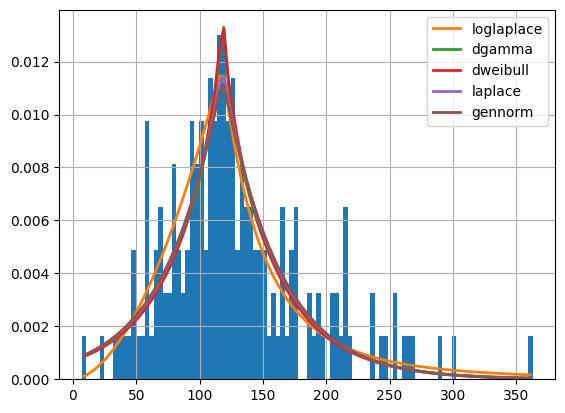

In [32]:
f = Fitter(eagles.ORushY)
f.fit()
f.summary()

C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr dist

sumsquare_error         aic         bic  kl_div  ks_statistic  \
skewnorm              0.827303  768.117380  777.577254     inf      0.056435   
genhyperbolic         0.827397  772.006679  787.773137     inf      0.101654   
weibull_min           0.827702  766.722469  776.182343     inf      0.064663   
burr12                0.827785  767.858047  780.471213     inf      0.062137   
norminvgauss          0.827786  768.963171  781.576337     inf      0.058796   

               ks_pvalue  
skewnorm        0.619514  
genhyperbolic   0.052138  
weibull_min     0.445931  
burr12          0.496765  
norminvgauss    0.567677

C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.p

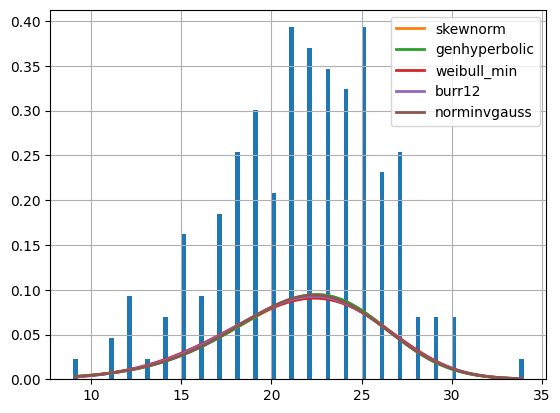

In [33]:
f = Fitter(eagles.O1stD)
f.fit()
f.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
C:\Users\kabde\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:3485: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED johnsonsu distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED powerlognorm d

sumsquare_error         aic         bic  kl_div  ks_statistic  \
dweibull              0.616115  755.600468  765.060343     inf      0.091170   
dgamma                0.616229  757.357144  766.817019     inf      0.098407   
genhyperbolic         0.618622  744.869611  760.636069     inf      1.000000   
invgauss              0.618757  740.754785  750.214660     inf      0.067423   
invgamma              0.618797  738.946339  748.406214     inf      0.062522   

               ks_pvalue  
dweibull        0.105878  
dgamma          0.065468  
genhyperbolic   0.000000  
invgauss        0.393778  
invgamma        0.488842

C:\Users\kabde\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


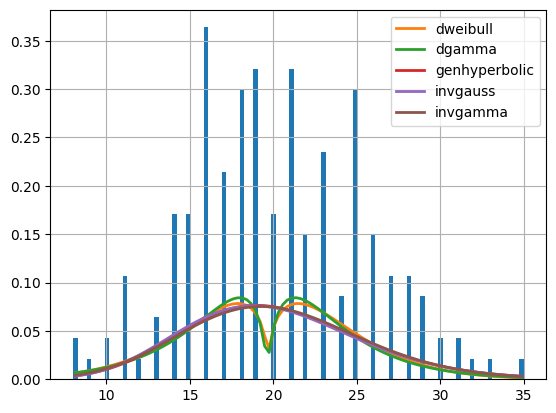

In [34]:
f = Fitter(eagles.D1stD)
f.fit()
f.summary()

## (d) Identify if there are any non-linearities within your variables. What transformations should you perform to make them linear? What would happen if you included nonlinear variables in your regression models without transforming them first?

Based on the graphical results from the pair plots as well as panda_profiling in section (b) the data appears to be linear. We will need to perform a transformation of the two variables DRushY and ORushY. The results of the transformation using Box-cox will be shown in the later section to follow.

0.49829613545987844


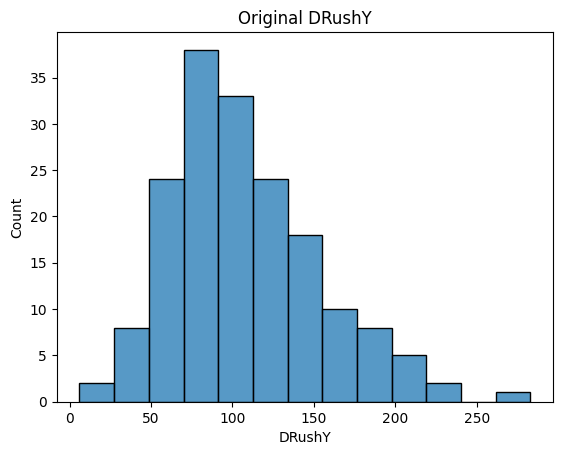

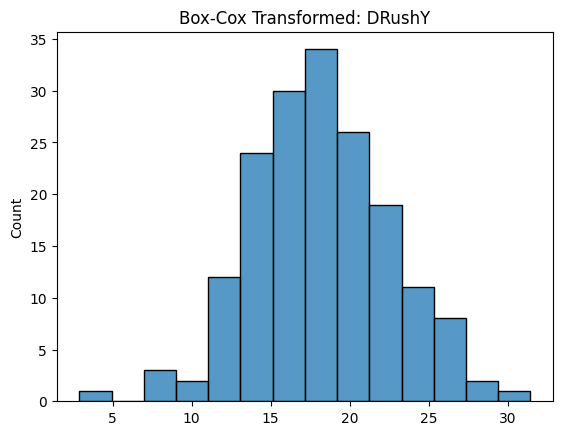

0.4559889588939842


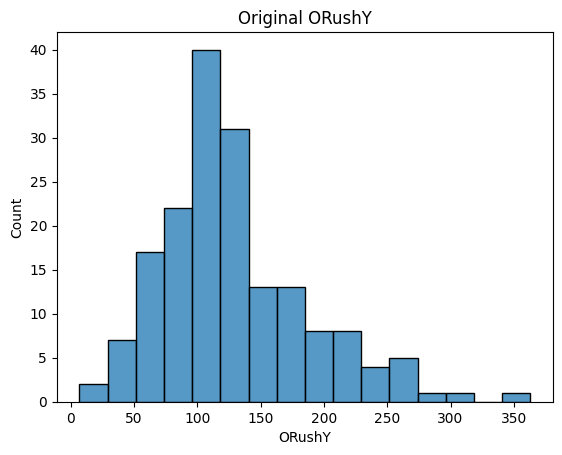

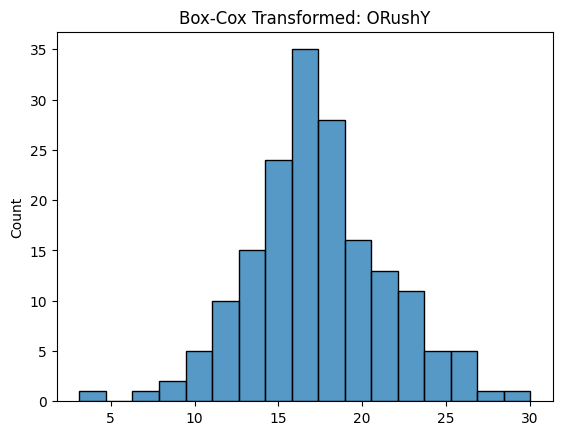

In [18]:
# Box-Cox Transformation of DRushY and ORushY
import scipy


bc_DRY,lambda_DRY = scipy.stats.boxcox(eagles["DRushY"])
print(lambda_DRY)

sns.histplot(eagles["DRushY"])
plt.title("Original DRushY")
plt.show()

sns.histplot(bc_DRY)
plt.title("Box-Cox Transformed: DRushY")
plt.show()

bc_ORY,lambda_ORY = scipy.stats.boxcox(eagles["ORushY"])
print(lambda_ORY)

sns.histplot(eagles["ORushY"])
plt.title("Original ORushY")
plt.show()

sns.histplot(bc_ORY)
plt.title("Box-Cox Transformed: ORushY")
plt.show()


Upon comparison of the two variables before and after the transformation - the results show that the distributions appears normal.

In [19]:
# Here, we append the original dataset with the tranformed variables
eagles['BCORY']=bc_ORY
eagles['BCDRY']=bc_DRY
# New dataset r_vars
r_vars=eagles[['MOT','MOV','O1stD','D1stD','BCORY','BCDRY','Home_Games']]

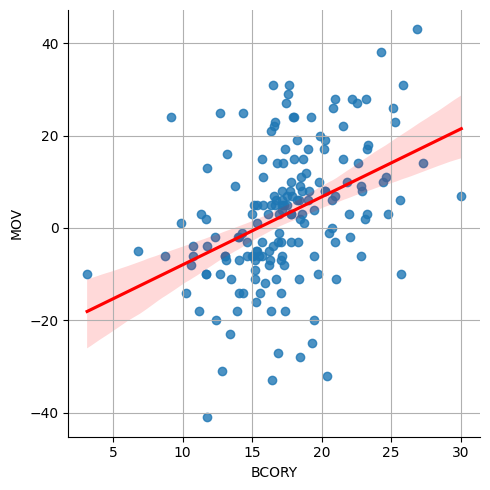

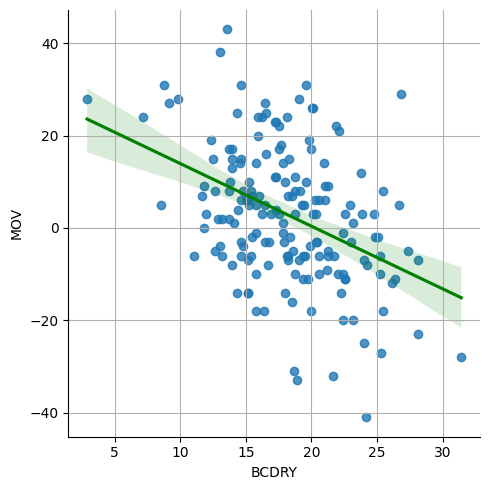

In [18]:
# Graphical Represenation of the transformed variables
sns.lmplot(data=r_vars, x='BCORY', y='MOV', line_kws={'color':'red'}, lowess=False, height=5, aspect=1)
plt.grid()
sns.lmplot(data=r_vars, x='BCDRY', y='MOV', line_kws={'color':'green'}, lowess=False, height=5, aspect=1)
plt.grid()

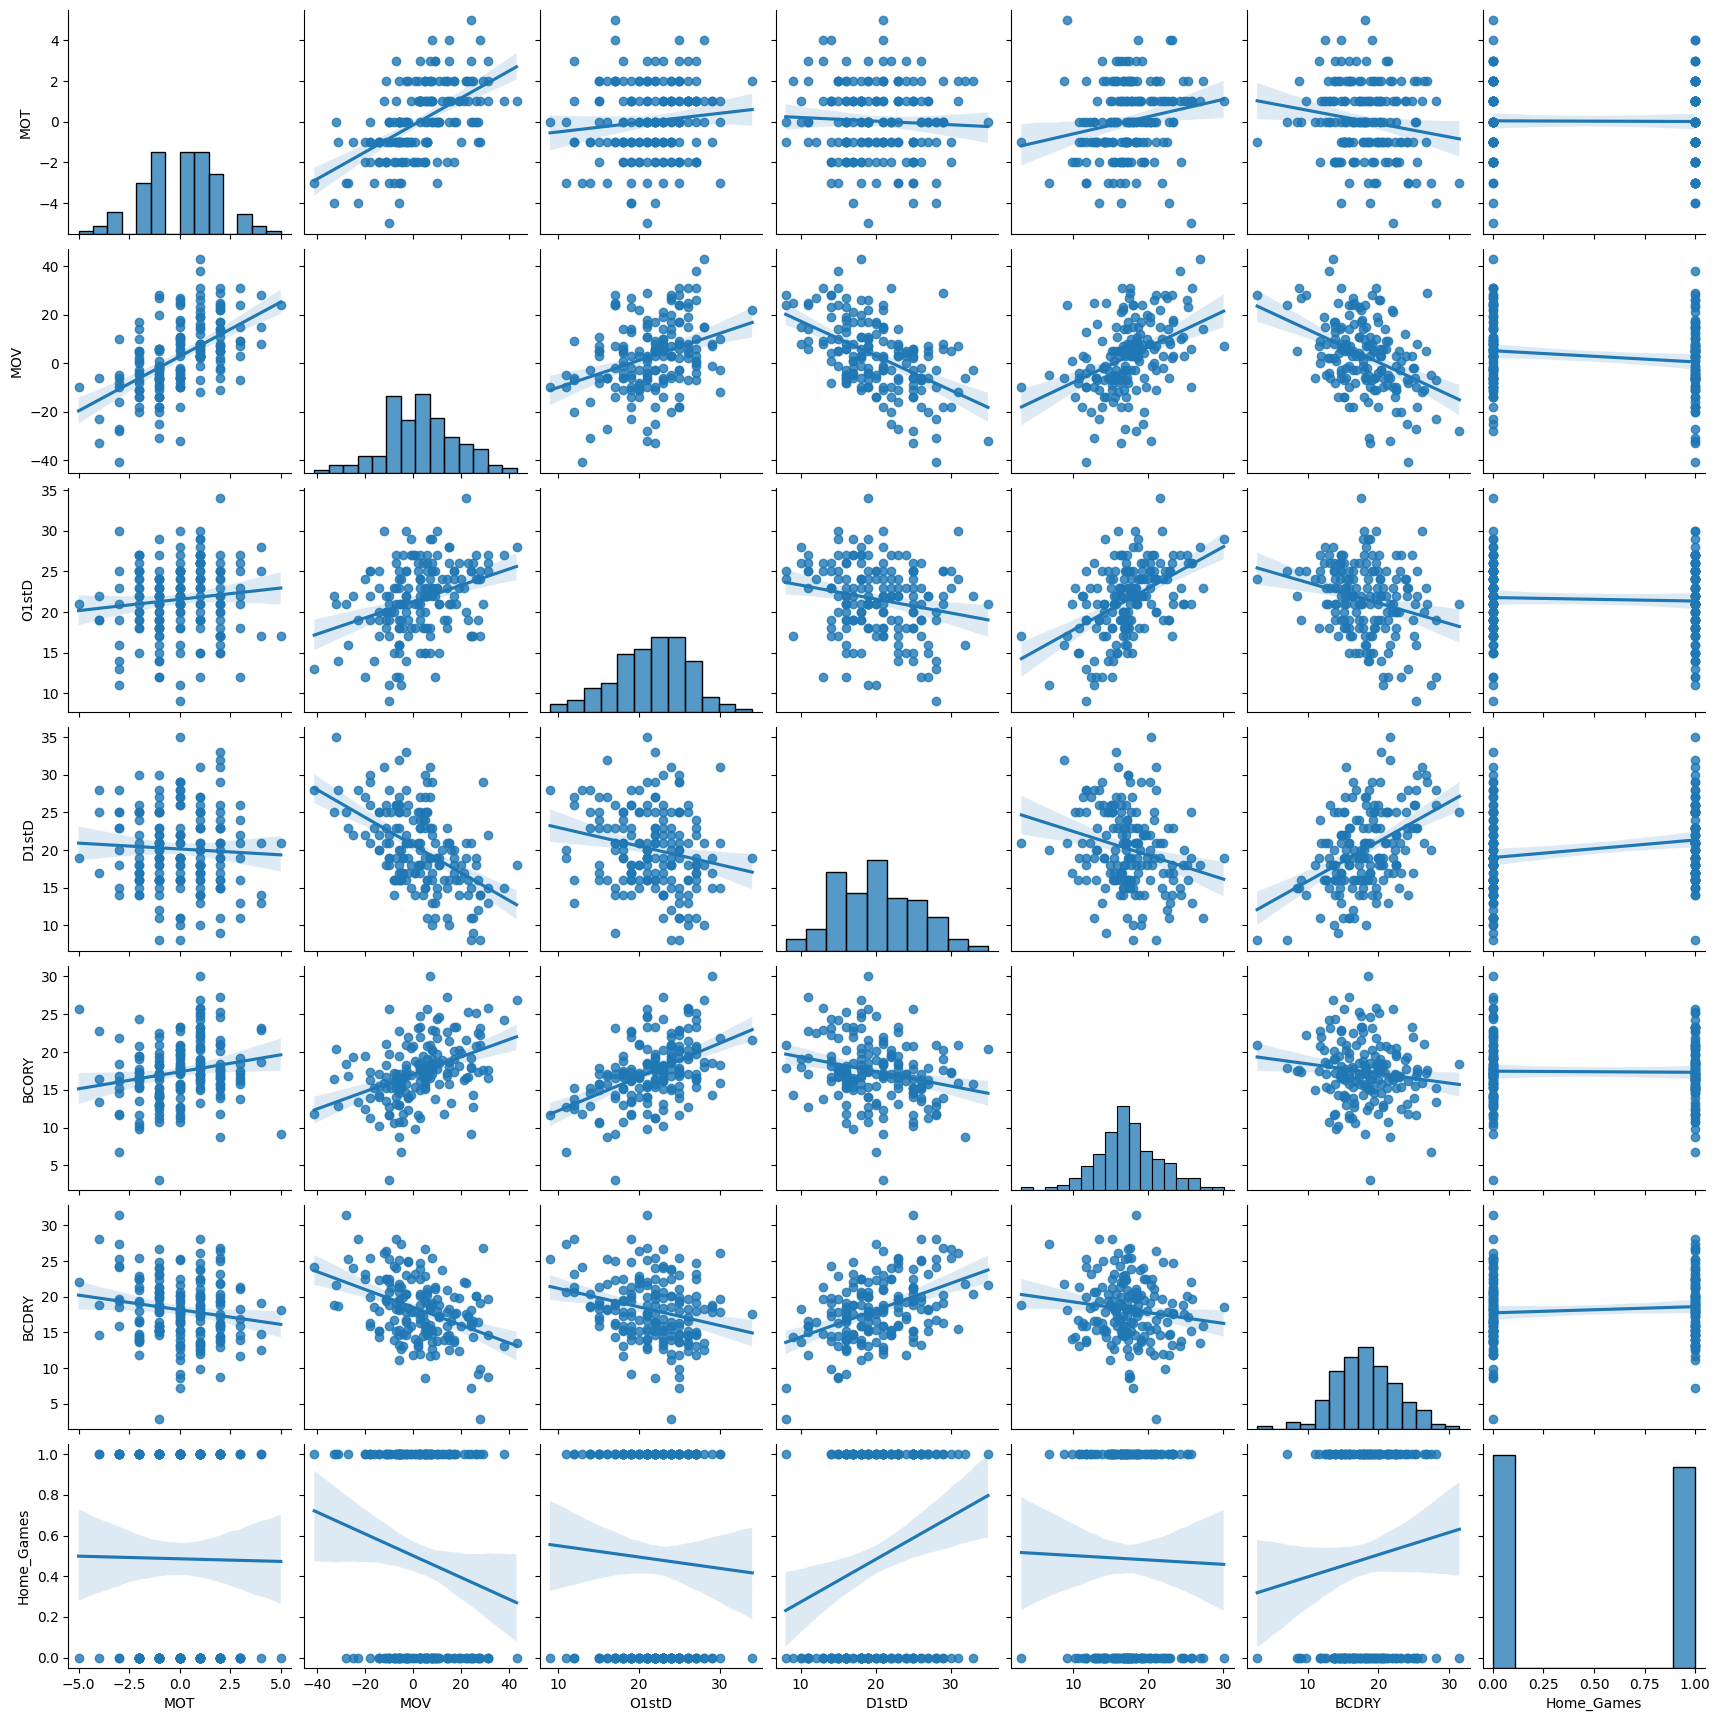

In [19]:
# Pair Plot
sns.pairplot(r_vars, kind='reg')

The new pair plot with the transformed variables BCDRY and BCORY shows these two variables with a normal distribution.

If non-linear variables are included in the model the results will not be robust and reliable in comparison to those of a model with linear variables.

## (e) Comment on any outliers and/or unusual features of your variables.

In the graphs below we will see very few outliers (less than 5%) but we do not find it appropriate to remove these outliers due to the nature of data. We think the removal of outliers will distort the findings of our analysis.

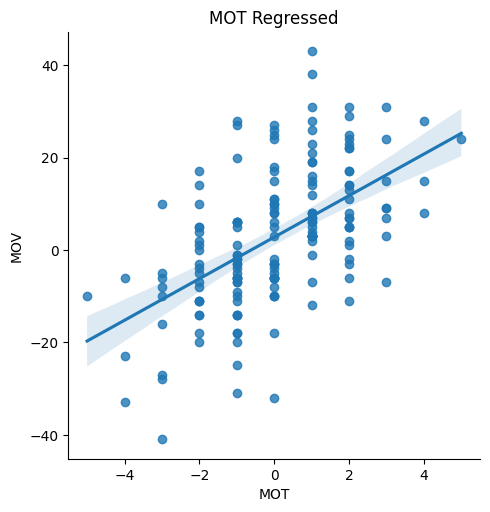

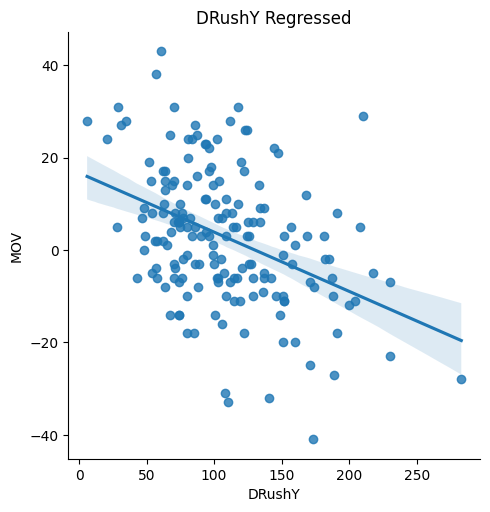

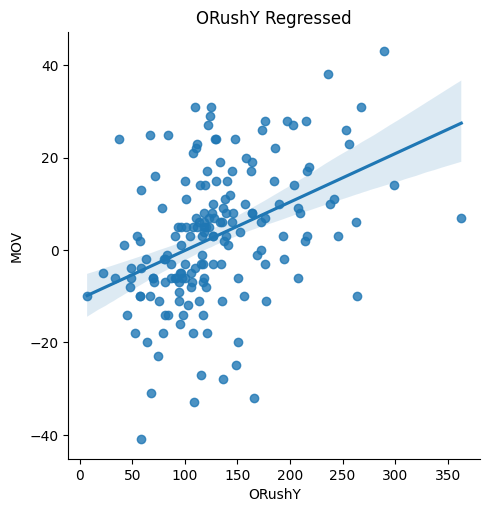

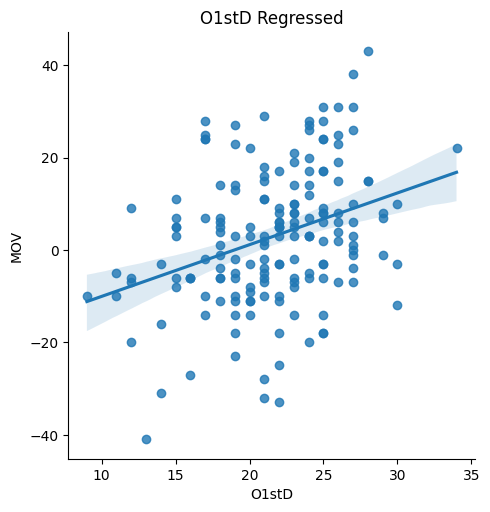

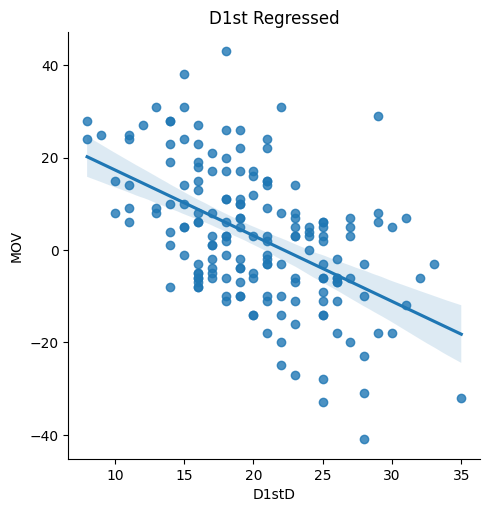

In [20]:
# Outliers
sns.lmplot(data = eagles, x = 'MOT', y = 'MOV')
plt.title("MOT Regressed")


sns.lmplot(data = eagles, x = 'DRushY', y = 'MOV')
plt.title("DRushY Regressed")


sns.lmplot(data = eagles, x = 'ORushY', y = 'MOV')
plt.title("ORushY Regressed")

sns.lmplot(data = eagles, x = 'O1stD', y = 'MOV')
plt.title("O1stD Regressed")


sns.lmplot(data = eagles, x = 'D1stD', y = 'MOV')
plt.title("D1st Regressed")

plt.show()


## (f) If you have any NAs, impute them using any of the methods discussed in class but make sure to justify your choice.

We do not have any NAs in our dataset as was confirmed in part 1(a)

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

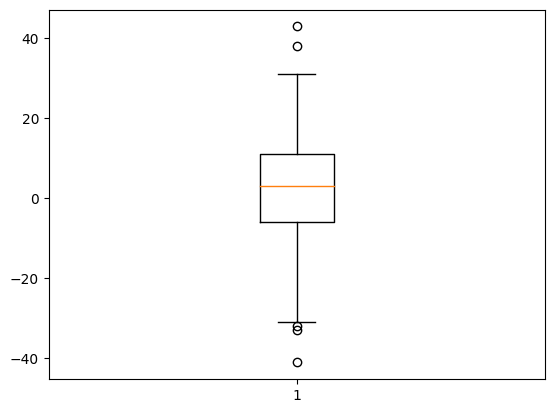

In [21]:
# Boxplots to show outliers
plt.boxplot(eagles.MOV)
plt.grid

The above box plot clearly indicates the presence of outliers.

# 2. Variable Selection:

## (a) Using the Boruta Algorithm identify the top 2 predictors

In [22]:
from BorutaShap import BorutaShap

from sklearn.ensemble import RandomForestRegressor

In [23]:
boruta_data = eagles[[ 'MOV','O1stD','BCORY','D1stD','BCDRY','MOT', 'Home_Games']].copy()

In [24]:
x = boruta_data.iloc[:,1:]

  0%|          | 0/100 [00:00<?, ?it/s]

5 attributes confirmed important: ['BCDRY', 'O1stD', 'D1stD', 'BCORY', 'MOT']
1 attributes confirmed unimportant: ['Home_Games']
0 tentative attributes remains: []


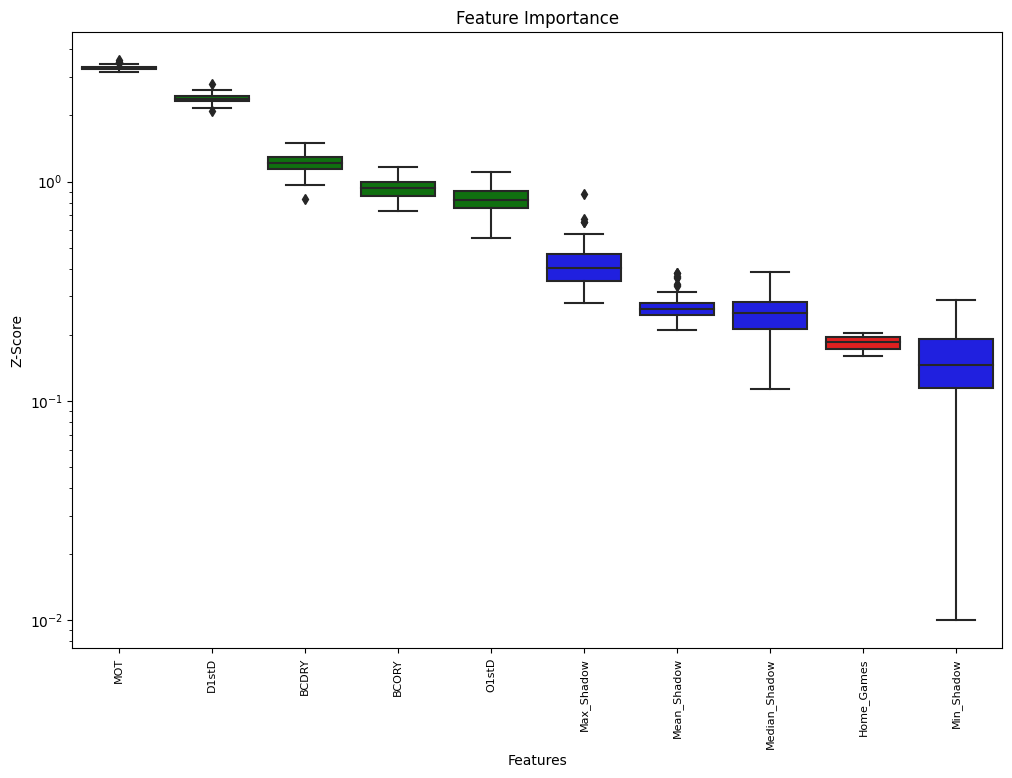

In [25]:
x = boruta_data.iloc[:, 1:]
y = boruta_data['MOV']
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=x, y=y, n_trials=100, random_state=0)
Feature_Selector.plot(which_features='all')

In [26]:
Feature_Selector.Subset()

BCDRY  O1stD  D1stD      BCORY  MOT
0    24.754325     27     23  23.247767    1
1    13.684295     25     20  20.182776    2
2    16.569813     21     20  13.222861    1
3    14.780713     25     13  22.923054    4
4    20.157584     24     23  18.615272    1
..         ...    ...    ...        ...  ...
168  15.809353     23     11  27.313920    2
169  16.355774     25     29  13.889061    0
170  13.557671     28     18  26.859759    1
171  12.908318     21     21  18.478211    2
172  25.047405     17     26  13.981570    2

[173 rows x 5 columns]

In [27]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
x = boruta_data.iloc[:, 1:]
y = boruta_data['MOV']
xCols = x.columns.tolist()

currentTrainX = x.to_numpy()
currentTrainY = y.to_numpy().ravel()

forest = RandomForestRegressor(n_jobs=-1, max_depth = 5)
forest.fit(currentTrainX, currentTrainY)

RandomForestRegressor(max_depth=5, n_jobs=-1)

In [28]:
np.int = int
np.float = float
np.bool = bool
boruta = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)
boruta.fit(currentTrainX, currentTrainY)

featureSupport = list((zip(xCols, boruta.support_)))
featureSupport

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	0
Rejected: 	2


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	0
Rejected: 	2


[('O1stD', False),
 ('BCORY', True),
 ('D1stD', True),
 ('BCDRY', True),
 ('MOT', True),
 ('Home_Games', False)]

In [29]:
# Ranking Boruta results
boruta.ranking_
# for better visualization use of the boruta ranking
featureRanks = list(zip(xCols, boruta.ranking_))
sorted(featureRanks, key=lambda x: x[1])

[('BCORY', 1),
 ('D1stD', 1),
 ('BCDRY', 1),
 ('MOT', 1),
 ('O1stD', 2),
 ('Home_Games', 3)]

The top ranking variables from our Boruta Algorithm are the Box-Cox Transformation of Offensive (BCORY) and Defensive (BCDRY) Rushing Yards as well as MOT and Defensive 1st Downs Allowed (D1stD).
The top 2 are BCORY and BCDRY

Going forward it would be prudent to work with one of these 4 explanatory variables, and we will use Mallows CP in order to come to a clearer solution.

## (b) Using Mallows Cp identify the top 2 predictors

In [31]:
from RegscorePy import mallow

In [21]:
model = smf.ols(formula='(MOV) ~ MOT + O1stD + BCORY + D1stD + BCDRY', data=eagles)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    MOV   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     49.36
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           3.40e-31
Time:                        23:56:09   Log-Likelihood:                -631.49
No. Observations:                 173   AIC:                             1275.
Df Residuals:                     167   BIC:                             1294.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7689      6.117      2.251      0.0

Now we have no issues with multicollinearity but that's probably because of the nature of the Box-Cox transformations reducing interpretability of the variables for Rush Yards offensively and defensively. That being said we get a lower value of intercept. First downs lose their significance as well. Overall this regression doesn't really provide much valuable or interpretable data. 

In [33]:
import itertools

model = smf.ols(formula='MOV ~ MOT + O1stD + BCORY + D1stD + BCDRY', data=eagles)
results = model.fit()
y = eagles['MOV']
y_pred=results.fittedvalues


storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
k = 8

for L in range(1, len(r_vars.columns[0:]) + 1):
    for subset in itertools.combinations(r_vars.columns[0:], L):

        formula1 = 'MOV~'+'+'.join(subset)

        results = smf.ols(formula=formula1, data = eagles).fit()
        y_sub = results.fittedvalues
        p = len(subset)+1

        cp = mallow.mallow(y, y_pred,y_sub, k, p)

        storage_cp = storage_cp._append({'Variables': subset, 'CP': cp}, ignore_index = True)

In [34]:
pd.set_option('display.max_columns', 2)
pd.set_option('display.max_rows', 127)
storage_cp.sort_values(by = "CP")

Variables          CP
1                                               (MOV,) -169.000000
17                                   (MOV, Home_Games) -167.000000
15                                        (MOV, BCORY) -167.000000
14                                        (MOV, D1stD) -167.000000
13                                        (MOV, O1stD) -167.000000
7                                           (MOT, MOV) -167.000000
16                                        (MOV, BCDRY) -167.000000
48                                 (MOV, D1stD, BCDRY) -165.000000
47                                 (MOV, D1stD, BCORY) -165.000000
46                            (MOV, O1stD, Home_Games) -165.000000
44                                 (MOV, O1stD, BCORY) -165.000000
43                                 (MOV, O1stD, D1stD) -165.000000
28                                   (MOT, MOV, O1stD) -165.000000
29                                   (MOT, MOV, D1stD) -165.000000
30                                   (MOT, MOV, BCORY) -165.000000
32                              (MOT, MOV, Home_Games) -165.000000
45                                 (MOV, O1stD, BCDRY) -165.000000
49                            (MOV, D1stD, Home_Games) -165.000000
31                                   (MOT, MOV, BCDRY) -165.000000
51                            (MOV, BCORY, Home_Games) -165.000000
52                            (MOV, BCDRY, Home_Games) -165.000000
50                                 (MOV, BCORY, BCDRY) -165.000000
87                     (MOV, O1stD, BCORY, Home_Games) -163.000000
86                          (MOV, O1stD, BCORY, BCDRY) -163.000000
65                            (MOT, MOV, O1stD, BCDRY) -163.000000
85                     (MOV, O1stD, D1stD, Home_Games) -163.000000
66                       (MOT, MOV, O1stD, Home_Games) -163.000000
67                            (MOT, MOV, D1stD, BCORY) -163.000000
84                          (MOV, O1stD, D1stD, BCDRY) -163.000000
83                          (MOV, O1stD, D1stD, BCORY) -163.000000
69                       (MOT, MOV, D1stD, Home_Games) -163.000000
70                            (MOT, MOV, BCORY, BCDRY) -163.000000
71                       (MOT, MOV, BCORY, Home_Games) -163.000000
72                       (MOT, MOV, BCDRY, Home_Games) -163.000000
68                            (MOT, MOV, D1stD, BCDRY) -163.000000
88                     (MOV, O1stD, BCDRY, Home_Games) -163.000000
63                            (MOT, MOV, O1stD, D1stD) -163.000000
90                     (MOV, D1stD, BCORY, Home_Games) -163.000000
91                     (MOV, D1stD, BCDRY, Home_Games) -163.000000
92                     (MOV, BCORY, BCDRY, Home_Games) -163.000000
64                            (MOT, MOV, O1stD, BCORY) -163.000000
89                          (MOV, D1stD, BCORY, BCDRY) -163.000000
117             (MOV, D1stD, BCORY, BCDRY, Home_Games) -161.000000
116             (MOV, O1stD, BCORY, BCDRY, Home_Games) -161.000000
115             (MOV, O1stD, D1stD, BCDRY, Home_Games) -161.000000
114             (MOV, O1stD, D1stD, BCORY, Home_Games) -161.000000
113                  (MOV, O1stD, D1stD, BCORY, BCDRY) -161.000000
107               (MOT, MOV, BCORY, BCDRY, Home_Games) -161.000000
106               (MOT, MOV, D1stD, BCDRY, Home_Games) -161.000000
104                    (MOT, MOV, D1stD, BCORY, BCDRY) -161.000000
103               (MOT, MOV, O1stD, BCDRY, Home_Games) -161.000000
102               (MOT, MOV, O1stD, BCORY, Home_Games) -161.000000
101                    (MOT, MOV, O1stD, BCORY, BCDRY) -161.000000
100               (MOT, MOV, O1stD, D1stD, Home_Games) -161.000000
99                     (MOT, MOV, O1stD, D1stD, BCDRY) -161.000000
98                     (MOT, MOV, O1stD, D1stD, BCORY) -161.000000
105               (MOT, MOV, D1stD, BCORY, Home_Games) -161.000000
119             (MOT, MOV, O1stD, D1stD, BCORY, BCDRY) -159.000000
120        (MOT, MOV, O1stD, D1stD, BCORY, Home_Games) -159.000000
121        (MOT, MOV, O1s

Based on the Mallows CP report we find that our best predictors of Margin of Victory (MOV) are Margin of Turnover (MOT) and Defensive 1st Downs Allowed (D1stD). We still observe very large Mallows CP values with these single explanatory variables relative to multivariable regression models.  

# 3. Model Building: Explore several competing OLS models (based on part 2) and decide on one model only (with just one predictor). You will need to explain in detail how you arrived at your preferred model. Discuss the economic significance of your parameters, and overall findings. Make sure you discuss your main conclusions and recommendations. At a minimum. you need to include the following checks:

In [35]:
# Specify the Model usings results from Mallow cp
ols_mod = smf.ols(formula='MOV ~ MOT', data = eagles)

# Fit the Model
ols_fit = ols_mod.fit()

# Look at the Model Fit Summary
print(ols_fit.summary())


                            OLS Regression Results                            
Dep. Variable:                    MOV   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     73.21
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           6.43e-15
Time:                        23:15:28   Log-Likelihood:                -679.15
No. Observations:                 173   AIC:                             1362.
Df Residuals:                     171   BIC:                             1369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7717      0.938      2.955      0.0

We fit a non robust model with an intercept of 2.77 (meaning we start off on average winning games with no turnovers by a margin of 3), followed by either a reduction or addition of 4 or 5 points for every turnover. This makes sense as turnovers can put offenses in advantageous positions, only having to attain a couple of first downs in order to achieve atleast 3 point, with the goal being 6 (but more often in practice 7). 

In [37]:
# Evaluating the model
import statsmodels.stats.api as sms
from simple_colors import *

# Linearity: Harvey-Collier --> Ho: model is linear
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(ols_fit)
print(blue("Linearity Test Results:",['bold']))
print(list(zip(name, test)))
print("\n")

# Normaility of the Residuals: Jarque-Bera --> Residuals ~ N(0,1)
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(ols_fit.resid)
print(blue("JB Results:",['bold']))
print(list(zip(name, test)))
print("\n")

# Heteroskedasticity: Breush-Pagan --> Ho: var = constant
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(ols_fit.resid, ols_fit.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))

Linearity Test Results:
[('t-stat', -0.9843242300354407), ('p-value', 0.3263632181550974)]


JB Results:
[('Jarque-Bera', 1.863410374413642), ('Chi^2 two-tail prob.', 0.39388149572106407), ('Skew', 0.22229528943369903), ('Kurtosis', 3.2466718767692595)]


BP Results:
[('Lagrange multiplier statistic', 0.3603567532061924), ('p-value', 0.548308170650365), ('f-value', 0.3569342686266421), ('f p-value', 0.5510041204231912)]


In [38]:
# Test for normality of residuals - JB test
stats.jarque_bera(ols_fit.resid)

SignificanceResult(statistic=1.863410374413642, pvalue=0.39388149572106407)

Based on the output for the test for linearity, since the p-value is > alpha 0.05 we fail to reject the null and conclude that the model is linear

As for normality test, the JB Results show that the errors are normally distributed because the p-value is > alpha 0.05 even though the JB score = 1.8 which is > 1 (kurtosis is 3.2..., skewness is 0.2)

For Heteroskedasticity we observe that it is not possible to reject the null hypothesis that the variance is constant. This is due to the high p-value, and as such we can be fairly confident that as there is an increase in x there may be no observable increase in the variance of y.

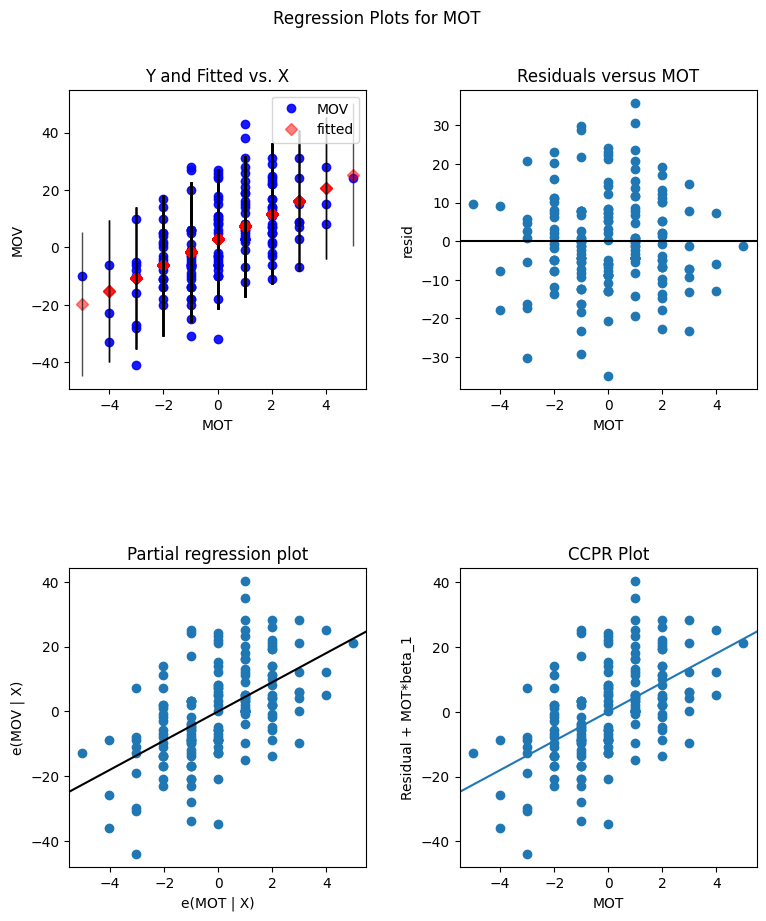

In [39]:
# Diagnostic plots of ols fit
figD = sm.graphics.plot_regress_exog(ols_fit, "MOT")
figD.set_figheight(10)
figD.set_figwidth(8)
plt.show()

MOV vs MOT shows a positive correlation. MOT vs residuals appears to be scattered around 0

In [40]:
model = smf.ols(formula='(MOV) ~ MOT + O1stD + BCORY + D1stD + BCDRY + Home_Games', data=eagles)
results = model.fit()
y = (eagles['MOV'])
y_pred=results.fittedvalues

# Using subset size =1
mr_sub = smf.ols(formula='(MOV) ~ MOT', data=eagles)
mr_sub_fit = mr_sub.fit()
y_sub=mr_sub_fit.fittedvalues

k = 8 # number of parameters in orginal model (includes y-intercept)
p = 3 # number of parameters in the subset model (includes y-intercept)

mallow.mallow(y, y_pred,y_sub, k, p)

121.27263122025579

In [41]:
model = smf.ols(formula='(MOV) ~ MOT + O1stD + BCORY + D1stD + BCDRY + Home_Games', data=eagles)
results = model.fit()
y = (eagles['MOV'])
y_pred=results.fittedvalues

# Using subset size =1
mr_sub = smf.ols(formula='(MOV) ~ D1stD', data=eagles)
mr_sub_fit = mr_sub.fit()
y_sub=mr_sub_fit.fittedvalues

k = 8 # number of parameters in orginal model (includes y-intercept)
p = 3 # number of parameters in the subset model (includes y-intercept)

mallow.mallow(y, y_pred,y_sub, k, p)

136.58084931793445

Using the results of the Mallow's CP the output showed that the best model with one predictor was MOV ~ MOT, followed by MOV~ D1stD. We tested the two models and found the first one had the lowest result, so we chose that as the best model with one predictor.




## Look at Cook’s distance Plot, Residuals Plot

In [ ]:
# Specify model
Turnover = smf.ols(formula='MOV ~ MOT', data=eagles)
T_results = Turnover.fit(cov_type='HC1')
print(T_results.summary())
T_results.resid.mean()

<function matplotlib.pyplot.show(close=None, block=None)>

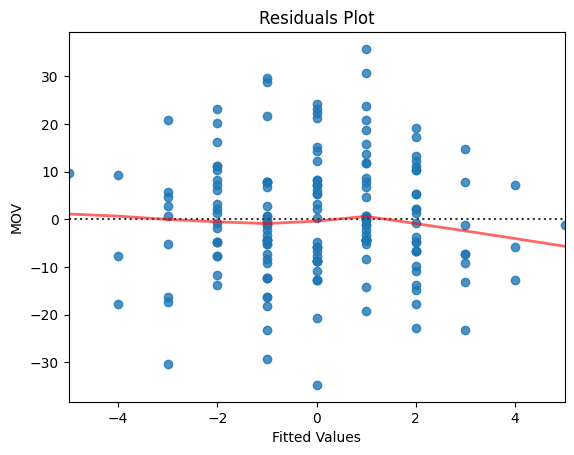

In [43]:
# Plot of residuals
sns.residplot(x='MOT', y='MOV', data=eagles,
              lowess=True, line_kws={'color':'red', 'lw':2, 'alpha':0.6})
plt.xlabel('Fitted Values')
plt.title('Residuals Plot')
plt.show

We can find that towards the end of the graph we find signficant high leverage observations in which the MOT shows a negative value but the MOV still remains quite high. These negative observations seem to heavily affect the residuals of the regression, even though it can be expected that a positive turnover margin would result a postive margin of victory.

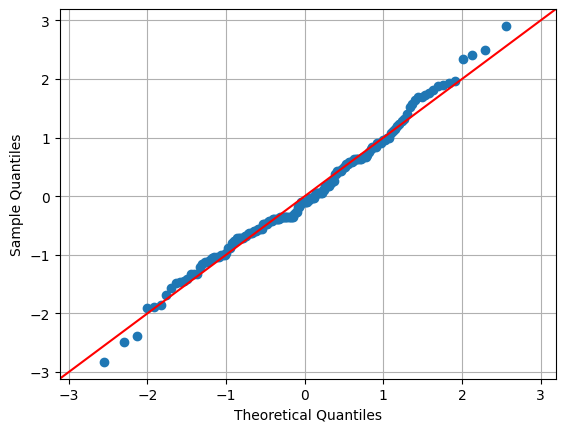

In [44]:
# QQ plot on studentized residuals
student_resid=T_results.get_influence().resid_studentized
df=len(student_resid)-4
t_dist=stats.t(df)
sm.qqplot(student_resid, line='45', dist=t_dist)
plt.grid()

In this QQ plot of the studentized residuals we see 7 observations that fall outside an absolute standard deviation of 2 from the mean.

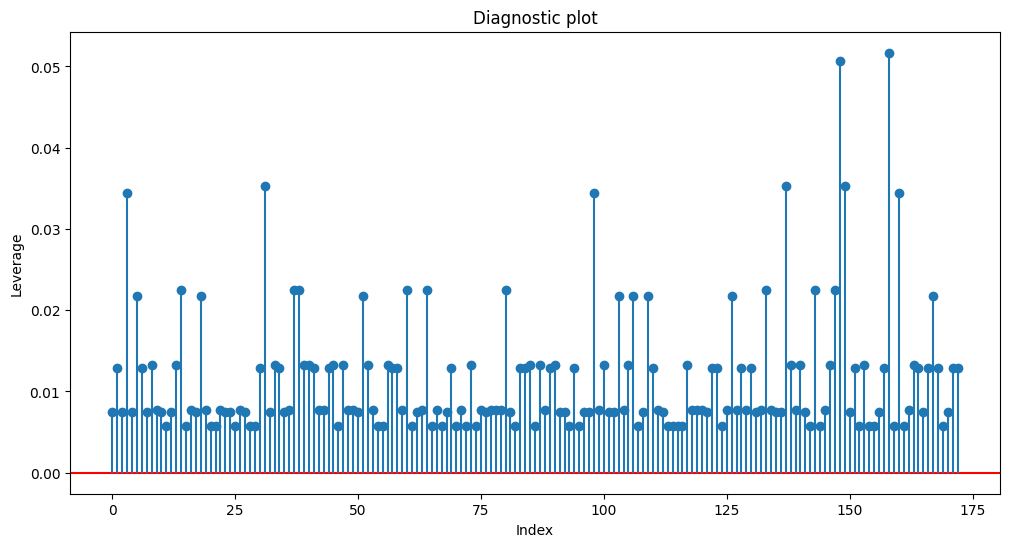

In [45]:
# Leverage plot
leverage=T_results.get_influence().hat_matrix_diag
plt.figure(figsize=(12,6))
plt.scatter(eagles.index,leverage)
plt.axhline(0,color='red')
plt.vlines(x=eagles.index, ymin=0,ymax=leverage)
plt.xlabel('Index')
plt.ylabel('Leverage')
plt.title('Diagnostic plot')
plt.show()

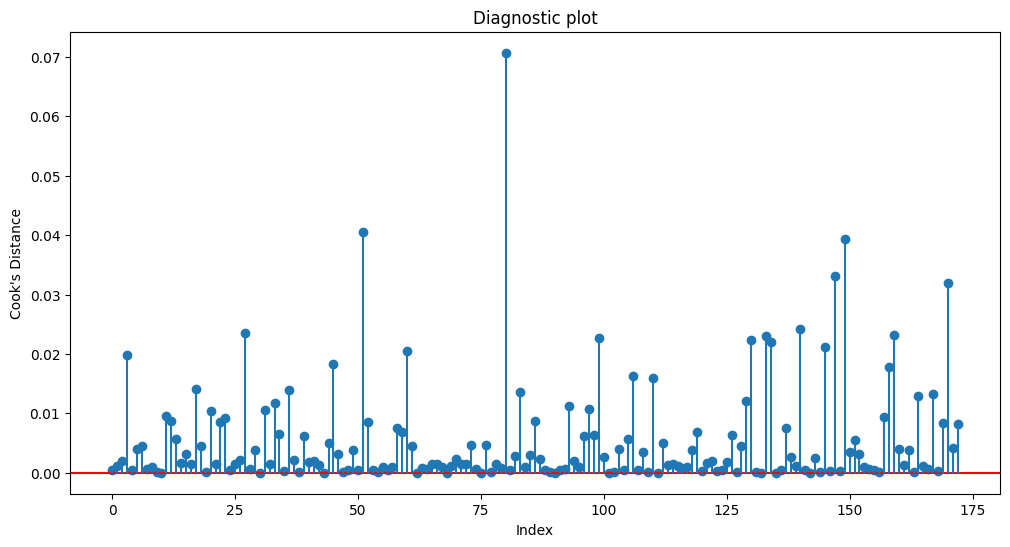

In [46]:
# Cook's distance plot
cooks_distance=T_results.get_influence().cooks_distance
plt.figure(figsize=(12,6))
plt.scatter(eagles.index,cooks_distance[0])
plt.axhline(0,color='red')
plt.vlines(x=eagles.index, ymin=0,ymax=cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Diagnostic plot')
plt.show()

The cook's distance graph shows one influential data point.

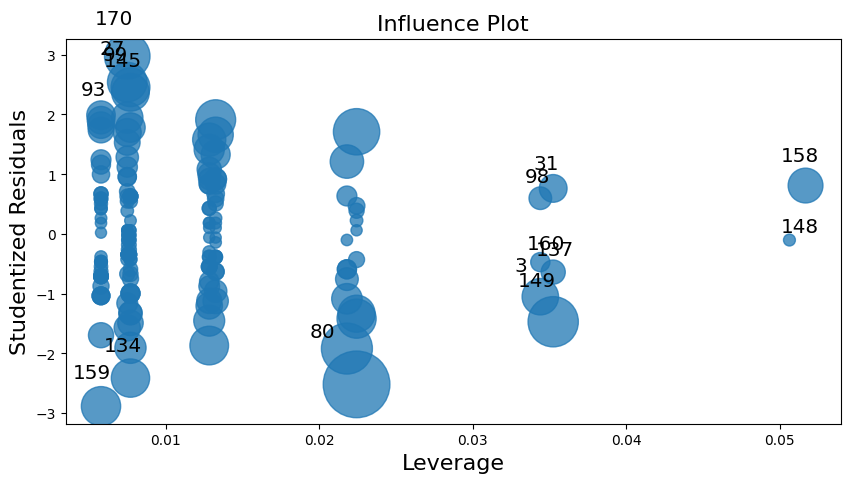

In [47]:
fig, ax= plt.subplots(figsize=(10,5))
fig=sm.graphics.influence_plot(T_results, ax=ax, criterion='cooks')

As we can see in the above influence and leverage plot there are a considerable amount of high leverage and high influence observations, but they can't be removed due to various reasons. These include the fact that the games in which the Eagles play are both real data points and that there are deliberate decisions made by professionals that go into the outcomes of football games. As such it would not be appropriate to prune the date of high leverage data. 

## Evaluate the robustness of your coefficient estimates by bootstrapping your model. Provide a histogram of the bootstrapped estimates (including R^2), and comment on the findings. In particular how do these estimates compare against your LS estimates?

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
coefs=pd.DataFrame(columns=['B0','B1'])

for i in range(1000):
  sample = eagles.sample(eagles.shape[0], replace=True)
  results=smf.ols('MOV~MOT', sample).fit()
  b0,b1=results.params
  coefs=coefs._append({'B0':b0, 'B1':b1}, ignore_index=True)
# 5% CI
b0_u, b1_u = coefs.quantile(.975)
b0_l, b1_l = coefs.quantile(.025)

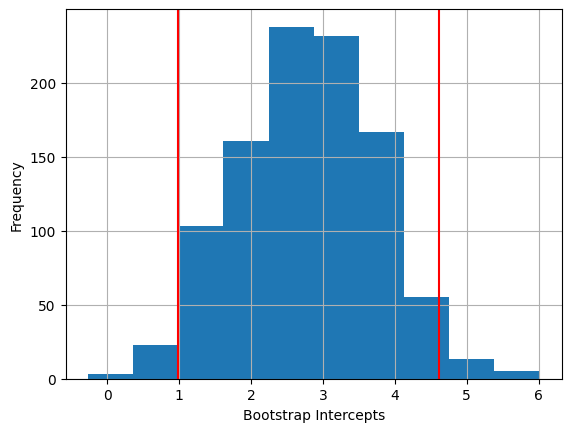

In [50]:
# Bootrstapped Histograms with CI
coefs.B0.hist()
plt.xlabel("Bootstrap Intercepts")
plt.ylabel("Frequency")
plt.axvline(b0_u, color = "red")
plt.axvline(b0_l, color = "red")

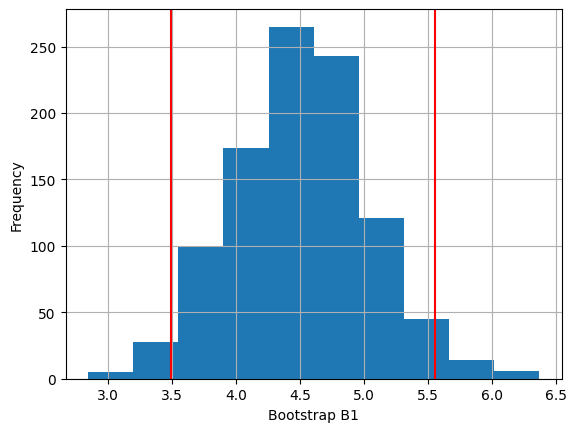

In [51]:
coefs.B1.hist()
plt.xlabel("Bootstrap B1")
plt.ylabel('Frequency')
plt.axvline(b1_u, color = 'red')
plt.axvline(b1_l, color = 'red')

Based on the bootstrap results the intercepts (about 2.8) and the slopes (about 4.5) are close enough to those from the results of tne LS estimates (2.77 and 4.49)

## Confidence intervals

In [52]:
from scipy.stats import bootstrap

# Defining MOT coefficient
def reg_boot_b1(x,y):

    x = x.reshape((len(x),1))
    y = y.reshape((len(x),1))
    reg = LinearRegression().fit(x,y)

    return reg.coef_[0][0]
    #Pulling out Beta1 value

# Defining intercept
def reg_boot_intercept(x,y):

    x = x.reshape((len(x),1))
    y = y.reshape((len(x),1))
    reg = LinearRegression().fit(x,y)

    return reg.intercept_[0]
    # Pulling out Intercept value

X = eagles.MOT
Y = eagles.MOV
res = bootstrap((X,Y), reg_boot_b1, confidence_level=0.95, vectorized=False, method='BCa',
              paired=True)
print(res.confidence_interval)

ConfidenceInterval(low=3.5597200129169444, high=5.5465785672423324)


With a 95% CI we are confident that the estimated reg_boot_b1 (beta 1) falls between (3.540241015898647, 5.526534689378149)

In [53]:
res = bootstrap((X,Y), reg_boot_intercept, confidence_level=0.95, vectorized=False, method='BCa',
              paired=True)
print(res.confidence_interval)

ConfidenceInterval(low=0.9265648020958546, high=4.6401653396316025)


With a 95% CI we are confident that the estimated reg_boot_intercept (beta 0) falls between (1.0055391051206657, 4.604349878033104)

## Use cross-validation to evaluate your model’s performance


In [54]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

x = eagles[['MOT']]
y = eagles[['MOV']]
# Perform an OLS fit using all the data
regr = LinearRegression()
model = regr.fit(x,y)
regr.coef_
regr.intercept_

# Split the data into train  (70%)/test(30%) samples:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train the model:
regr = LinearRegression()
regr.fit(x_train, y_train)

# Make predictions based on the test sample
y_pred = regr.predict(x_test)

# Evaluate Performance
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Perform a 5-fold CV
regr = linear_model.LinearRegression()
scores = cross_val_score(regr, x, y, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV RMSE Scores:', scores)

MAE: 9.435276975984142
MSE: 162.93430541061392
RMSE: 12.764572276837713
5-Fold CV RMSE Scores: [-12.89987682 -10.67071177 -12.22473686 -11.72389117 -14.56047974]


Root Mean Squared Error (RMSE), which measures the average prediction error made by the model in predicting the outcome for an observation shows a value of 12.765. For the variable MOT, the mean is 2.9, the median is 3, and Std is 14.

The lower the RMSE, the better the model. In this case we have a high RMSE which may mean that our model does not accurately explain all the dynamics that result in values we see in the MOV column. Our R^2 of 0.300 with an adjusted R^2 of 0.296 shows that initially regressing MOV on MOT only accounted for about 30% of the observed dynamics between the two variables.

Ultimately, we see that our value of RMSE falls just under the standard deviation and as a result we could be anywhere from 10-13 points off from the actual MOV. That is a value of 1.5 touchdowns to almost 2 touchdowns, which is quite large in terms of football as teams scores an average of 3.5 touchdowns per game in the modern NFL. As such it shows that we need more than one explanatory variable when it comes to truly analyzing MOV.

With that being said, ball possession and security are considered tantamount to success in the NFL. When the Eagles went on their 8-game winning streak in 2022, many highlighted the large positive turnover margin as a key to their success. But one could also see that the Eagles offense was excellent in terms of Red Zone Offense and large passing plays. These dynamics can't be shown, and also, it's questionable whether they would be necessary in a proper regression analysis due to their relation with the MOV variable and the ensuing endogeneity.

Overall, MOT is statistically significant when it comes to determining game outcomes in the form of MOV. But, using one variable is simply not enough to be able to predict something so complex and variable, especially when there are aspects of "relative" luck, skill, psychology, time of games, offensive prowess etc. MOT is a variable that we can use as a step to forming a more accurate multivariable regression, but can't explain everything that gives the resulting MOV.

So, while the RMSE values in comparison to our data may make it seem that using MOT to predict MOV may seem dubious, the real issue comes from the fact that the model itself is not robust due the lack of predictors. MOT is both valuable as a way to predict MOV and overall team success in both layman’s and a statistician’s terms, but it is just one of many confounding variables that determine on field performance in the game of football. You keep turnovers down on the offensive side of the ball, and get turnovers on the defensive side of the ball the more likely it is you are going to score and beat your opponent. The more you do this the greater the expected MOV, but this is not always the case, and that makes America’s sport so enigmatic in nature.
